In [2]:
import os
from remap import remap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset
from mpl_toolkits.axes_grid.inset_locator import inset_axes
import geopandas as gpd

from cpt_convert import loadCPT
from matplotlib.colors import LinearSegmentedColormap

In [3]:
path = 'noaa-goes16/ABI-L2-CMIPF/2019/297/17'
files = [os.path.join(path, file) for file in os.listdir(path)]
files = list(filter(lambda x: x.endswith('.nc'), files))

Remapping noaa-goes16/ABI-L2-CMIPF/2019/297/17/OR_ABI-L2-CMIPF-M6C10_G16_s20192971710363_e20192971720082_c20192971720162.nc
- finished! Time: 0.057084083557128906 seconds


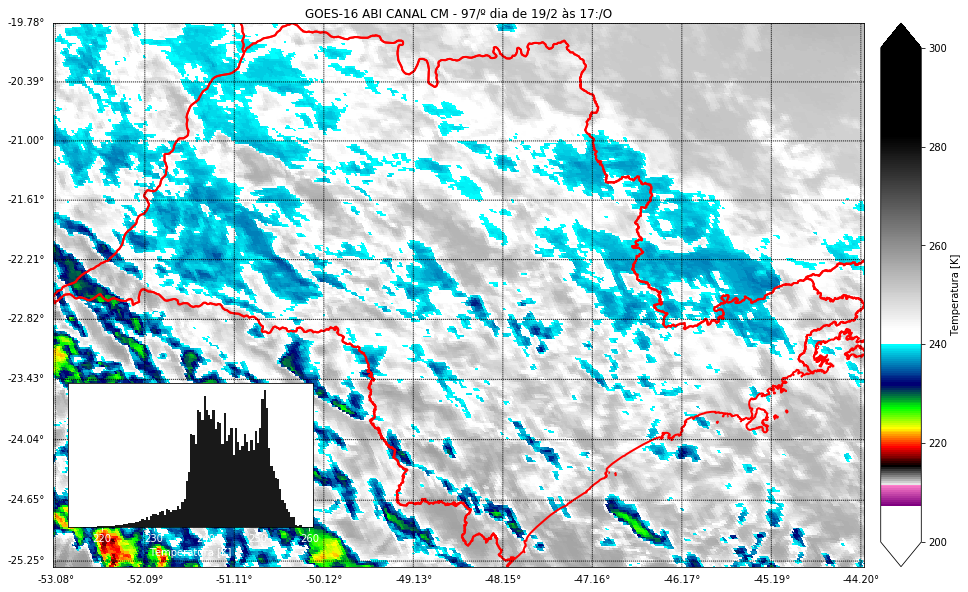

In [11]:
shp = gpd.read_file('./shapefiles/estadosl_2007.shp')
shp = shp[shp['SIGLAUF3'] == 'SP']
bbox = shp.bounds.values[0]

channel = files[0][19:21]
year = files[0][27:31]
day = files[0][31:34]
hour = files[0][34:36]
minute = files[0][36:38]
plt.figure(figsize=(17, 10))

plt.title('GOES-16 ABI CANAL %s - %sº dia de %s às %s:%s'%(channel, day, year, hour, minute))
b = Basemap(projection='merc', llcrnrlon=bbox[0], llcrnrlat=bbox[1], 
            urcrnrlon=bbox[2], urcrnrlat=bbox[3])
b.readshapefile('./shapefiles/estadosl_2007', name='sp', linewidth=2, color='red')

bbox = [-53.08059692, -25.25489044, -44.20065689, -19.78015137]
# bbox = [-60, -33, -45, 15]

cpt = loadCPT('./IR4AVHRR6.cpt')
cpt_convert = LinearSegmentedColormap('cpt', cpt)

data = remap(files[0], bbox, 1, 'netCDF')
grid = data.ReadAsArray()

lons = np.linspace(bbox[0], bbox[2], grid.shape[1])
lats = np.linspace(bbox[1], bbox[3], grid.shape[0])

b.drawmeridians(np.linspace(bbox[0], bbox[2], 10), labels=[False, False, False, True], 
                fmt='%.2f', labelstyle='+/-', color='k')
b.drawparallels(np.linspace(bbox[1], bbox[3], 10), labels=[True, False, False, False], 
                fmt='%.2f', labelstyle='+/-', color='k')

cmap = b.imshow(grid,  origin='upper', vmin=200, vmax=300, cmap=cpt_convert)
cbar = b.colorbar(cmap, extend='both', label='Temperatura [K]')
inside = plt.axes([.17, .18, .20, .20])

inside.hist(grid.reshape(1, -1)[0], bins=100, color='k', alpha=.9)
inside.set_xlabel('Temperatura [K]', color='w')
inside.set_yticks([])
inside.tick_params(colors='w')
plt.show()

In [39]:
days = [297]
hours = np.arange(24)
channels = [13]
shp = gpd.read_file('./shapefiles/estadosl_2007.shp')
shp = shp[shp['SIGLAUF3'] == 'SP']
bbox = shp.bounds.values[0]
poly = shp.geometry.values[0]

In [48]:
ts = []
for day in days:
    for hour in hours:
        path = 'noaa-goes16/ABI-L2-CMIPF/2019/%s/%s'%(day, str(hour).zfill(2))
        files = [os.path.join(path, file) for file in os.listdir(path)]    
        files = list(filter(lambda x: x.endswith('.nc'), files))
        files = list(filter(lambda x: 'C13' in x, files))
        
        for file in files:
#             channel = file.split('/')[-1][19:21]
#             year = file.split('/')[-1][27:31]
#             day = file.split('/')[-1][31:34]
#             hour = file.split('/')[-1][34:36]
#             minute = file.split('/')[-1][36:38]
            
#             plt.figure(figsize=(17, 10))
#             plt.title('GOES-16 ABI CANAL %s - %sº dia de %s às %s:%s'%(channel, 
#                                                                        day, 
#                                                                        year, 
#                                                                        hour, 
#                                                                        minute))
#             b = Basemap(projection='merc', llcrnrlon=bbox[0], llcrnrlat=bbox[1]
#                         ,urcrnrlon=bbox[2], urcrnrlat=bbox[3])
#             b.readshapefile('./shapefiles/estadosl_2007', name='sp', 
#                             linewidth=2, color='red')
#             cpt = loadCPT('./IR4AVHRR6.cpt')
#             cpt_convert = LinearSegmentedColormap('cpt', cpt)
            
            data = remap(file, bbox, 1, 'netCDF')
            grid = data.ReadAsArray()
            ts.append(grid)
#             lons = np.linspace(bbox[0], bbox[2], grid.shape[1])
#             lats = np.linspace(bbox[1], bbox[3], grid.shape[0])
            
#             for lat, i in zip(lats, range(grid.shape[0])):
#                 for lon, j in zip(lons, range(grid.shape[1])):
#                     point = Point(lon, lat)
#                     print(i, ', ', j, ': ', point)
#                     if not poly.contains(point):
#                         grid[i][j] = np.nan
            
#             b.drawmeridians(np.linspace(bbox[0], bbox[2], 10), labels=[False, 
#                             False, False, True], fmt='%.2f', 
#             labelstyle='+/-', color='k')
#             b.drawparallels(np.linspace(bbox[1], bbox[3], 10), 
#                             labels=[True, False, False, False], fmt='%.2f', 
#                             labelstyle='+/-', color='k')
            
#             cmap = b.imshow(grid,  origin='upper', vmin=200, vmax=300, 
#                             cmap=cpt_convert)
#             cbar = b.colorbar(cmap, extend='both', label='Temperatura [K]')
            
#             inside = plt.axes([.17, .18, .20, .20])
#             inside.hist(grid.reshape(1, -1)[0], bins=100, color='k', alpha=.9)
#             inside.set_xlabel('Temperatura [K]', color='w')
#             inside.set_yticks([])
#             inside.tick_params(colors='w')
        
#            plt.show('hail/goes16-CH%s-%s-%s-%s-%s.png'%(channel, year, day, hour, minute))
#             plt.show()

Remapping noaa-goes16/ABI-L2-CMIPF/2019/297/00/OR_ABI-L2-CMIPF-M6C13_G16_s20192970040360_e20192970050080_c20192970050169.nc
- finished! Time: 0.05961799621582031 seconds
Remapping noaa-goes16/ABI-L2-CMIPF/2019/297/00/OR_ABI-L2-CMIPF-M6C13_G16_s20192970010360_e20192970020079_c20192970020163.nc
- finished! Time: 0.05186319351196289 seconds
Remapping noaa-goes16/ABI-L2-CMIPF/2019/297/00/OR_ABI-L2-CMIPF-M6C13_G16_s20192970050360_e20192970100080_c20192970100171.nc
- finished! Time: 0.0516357421875 seconds
Remapping noaa-goes16/ABI-L2-CMIPF/2019/297/00/OR_ABI-L2-CMIPF-M6C13_G16_s20192970020360_e20192970030079_c20192970030159.nc
- finished! Time: 0.053888797760009766 seconds
Remapping noaa-goes16/ABI-L2-CMIPF/2019/297/00/OR_ABI-L2-CMIPF-M6C13_G16_s20192970030360_e20192970040079_c20192970040162.nc
- finished! Time: 0.05077219009399414 seconds
Remapping noaa-goes16/ABI-L2-CMIPF/2019/297/00/OR_ABI-L2-CMIPF-M6C13_G16_s20192970000360_e20192970010079_c20192970010172.nc
- finished! Time: 0.053148269

Remapping noaa-goes16/ABI-L2-CMIPF/2019/297/08/OR_ABI-L2-CMIPF-M6C13_G16_s20192970810363_e20192970820083_c20192970820165.nc
- finished! Time: 0.09033083915710449 seconds
Remapping noaa-goes16/ABI-L2-CMIPF/2019/297/08/OR_ABI-L2-CMIPF-M6C13_G16_s20192970830363_e20192970840083_c20192970840183.nc
- finished! Time: 0.08812689781188965 seconds
Remapping noaa-goes16/ABI-L2-CMIPF/2019/297/08/OR_ABI-L2-CMIPF-M6C13_G16_s20192970800363_e20192970810083_c20192970810167.nc
- finished! Time: 0.07922029495239258 seconds
Remapping noaa-goes16/ABI-L2-CMIPF/2019/297/08/OR_ABI-L2-CMIPF-M6C13_G16_s20192970850363_e20192970900083_c20192970900169.nc
- finished! Time: 0.07653641700744629 seconds
Remapping noaa-goes16/ABI-L2-CMIPF/2019/297/08/OR_ABI-L2-CMIPF-M6C13_G16_s20192970820363_e20192970830083_c20192970830175.nc
- finished! Time: 0.07822012901306152 seconds
Remapping noaa-goes16/ABI-L2-CMIPF/2019/297/09/OR_ABI-L2-CMIPF-M6C13_G16_s20192970900363_e20192970910083_c20192970910178.nc
- finished! Time: 0.079815

- finished! Time: 0.0792996883392334 seconds
Remapping noaa-goes16/ABI-L2-CMIPF/2019/297/16/OR_ABI-L2-CMIPF-M6C13_G16_s20192971620365_e20192971630085_c20192971630175.nc
- finished! Time: 0.0851595401763916 seconds
Remapping noaa-goes16/ABI-L2-CMIPF/2019/297/16/OR_ABI-L2-CMIPF-M6C13_G16_s20192971610365_e20192971620085_c20192971620166.nc
- finished! Time: 0.07523202896118164 seconds
Remapping noaa-goes16/ABI-L2-CMIPF/2019/297/16/OR_ABI-L2-CMIPF-M6C13_G16_s20192971600365_e20192971610084_c20192971610177.nc
- finished! Time: 0.08247065544128418 seconds
Remapping noaa-goes16/ABI-L2-CMIPF/2019/297/17/OR_ABI-L2-CMIPF-M6C13_G16_s20192971720363_e20192971730082_c20192971730176.nc
- finished! Time: 0.09825634956359863 seconds
Remapping noaa-goes16/ABI-L2-CMIPF/2019/297/17/OR_ABI-L2-CMIPF-M6C13_G16_s20192971730363_e20192971740082_c20192971740176.nc
- finished! Time: 0.10358214378356934 seconds
Remapping noaa-goes16/ABI-L2-CMIPF/2019/297/17/OR_ABI-L2-CMIPF-M6C13_G16_s20192971750363_e20192971800082_c

In [55]:
ts = []
for day in days:
    for hour in hours:
        path = 'noaa-goes16/ABI-L2-CMIPF/2019/%s/%s'%(day, str(hour).zfill(2))
        files = [os.path.join(path, file) for file in os.listdir(path)]    
        files = list(filter(lambda x: x.endswith('.nc'), files))
        files = list(filter(lambda x: 'C13' in x, files))
        
        sigma = 0
        for file in files:
            data = remap(file, bbox, 1, 'netCDF')
            grid = data.ReadAsArray()
            sigma += grid.mean()
            
        ts.append(sigma/len(files))

Remapping noaa-goes16/ABI-L2-CMIPF/2019/297/00/OR_ABI-L2-CMIPF-M6C13_G16_s20192970040360_e20192970050080_c20192970050169.nc
- finished! Time: 0.06118202209472656 seconds
Remapping noaa-goes16/ABI-L2-CMIPF/2019/297/00/OR_ABI-L2-CMIPF-M6C13_G16_s20192970010360_e20192970020079_c20192970020163.nc
- finished! Time: 0.05247068405151367 seconds
Remapping noaa-goes16/ABI-L2-CMIPF/2019/297/00/OR_ABI-L2-CMIPF-M6C13_G16_s20192970050360_e20192970100080_c20192970100171.nc
- finished! Time: 0.04985308647155762 seconds
Remapping noaa-goes16/ABI-L2-CMIPF/2019/297/00/OR_ABI-L2-CMIPF-M6C13_G16_s20192970020360_e20192970030079_c20192970030159.nc
- finished! Time: 0.05558323860168457 seconds
Remapping noaa-goes16/ABI-L2-CMIPF/2019/297/00/OR_ABI-L2-CMIPF-M6C13_G16_s20192970030360_e20192970040079_c20192970040162.nc
- finished! Time: 0.05460214614868164 seconds
Remapping noaa-goes16/ABI-L2-CMIPF/2019/297/00/OR_ABI-L2-CMIPF-M6C13_G16_s20192970000360_e20192970010079_c20192970010172.nc
- finished! Time: 0.051492

- finished! Time: 0.06546473503112793 seconds
Remapping noaa-goes16/ABI-L2-CMIPF/2019/297/08/OR_ABI-L2-CMIPF-M6C13_G16_s20192970800363_e20192970810083_c20192970810167.nc
- finished! Time: 0.054148197174072266 seconds
Remapping noaa-goes16/ABI-L2-CMIPF/2019/297/08/OR_ABI-L2-CMIPF-M6C13_G16_s20192970850363_e20192970900083_c20192970900169.nc
- finished! Time: 0.05069303512573242 seconds
Remapping noaa-goes16/ABI-L2-CMIPF/2019/297/08/OR_ABI-L2-CMIPF-M6C13_G16_s20192970820363_e20192970830083_c20192970830175.nc
- finished! Time: 0.052465200424194336 seconds
Remapping noaa-goes16/ABI-L2-CMIPF/2019/297/09/OR_ABI-L2-CMIPF-M6C13_G16_s20192970900363_e20192970910083_c20192970910178.nc
- finished! Time: 0.053807735443115234 seconds
Remapping noaa-goes16/ABI-L2-CMIPF/2019/297/09/OR_ABI-L2-CMIPF-M6C13_G16_s20192970940364_e20192970950083_c20192970950173.nc
- finished! Time: 0.05086922645568848 seconds
Remapping noaa-goes16/ABI-L2-CMIPF/2019/297/09/OR_ABI-L2-CMIPF-M6C13_G16_s20192970930364_e20192970940

- finished! Time: 0.05467367172241211 seconds
Remapping noaa-goes16/ABI-L2-CMIPF/2019/297/17/OR_ABI-L2-CMIPF-M6C13_G16_s20192971720363_e20192971730082_c20192971730176.nc
- finished! Time: 0.05428290367126465 seconds
Remapping noaa-goes16/ABI-L2-CMIPF/2019/297/17/OR_ABI-L2-CMIPF-M6C13_G16_s20192971730363_e20192971740082_c20192971740176.nc
- finished! Time: 0.050624847412109375 seconds
Remapping noaa-goes16/ABI-L2-CMIPF/2019/297/17/OR_ABI-L2-CMIPF-M6C13_G16_s20192971750363_e20192971800082_c20192971800176.nc
- finished! Time: 0.051961421966552734 seconds
Remapping noaa-goes16/ABI-L2-CMIPF/2019/297/17/OR_ABI-L2-CMIPF-M6C13_G16_s20192971710363_e20192971720082_c20192971720161.nc
- finished! Time: 0.055129051208496094 seconds
Remapping noaa-goes16/ABI-L2-CMIPF/2019/297/17/OR_ABI-L2-CMIPF-M6C13_G16_s20192971740363_e20192971750082_c20192971750176.nc
- finished! Time: 0.05356311798095703 seconds
Remapping noaa-goes16/ABI-L2-CMIPF/2019/297/17/OR_ABI-L2-CMIPF-M6C13_G16_s20192971700363_e20192971710

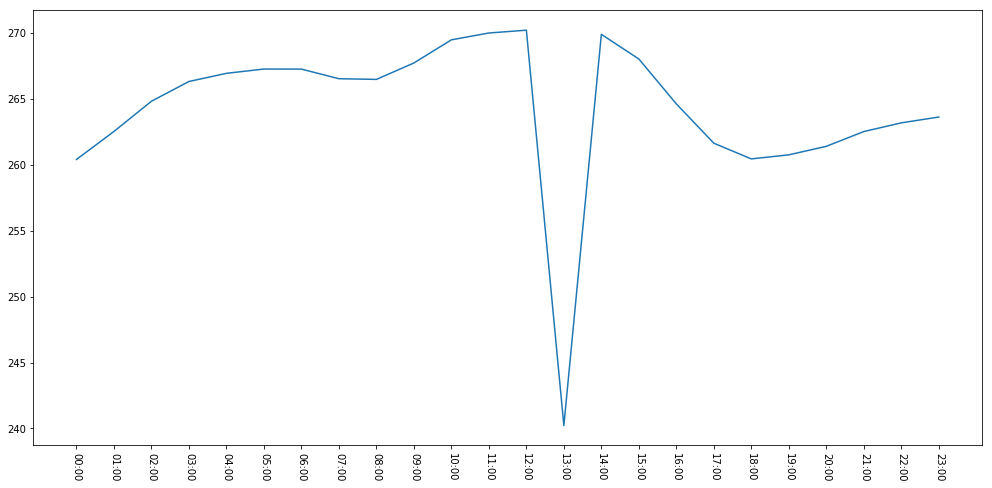

In [65]:
means = [d.mean() for d in ts]
hours = np.arange(24)
hours = ['%s:00'%str(hour).zfill(2) for hour in hours]
# means = list(filter(lambda x: x>225, means))

plt.figure(figsize=(17, 8))
plt.plot(hours, means)
_ = plt.xticks(rotation=270)

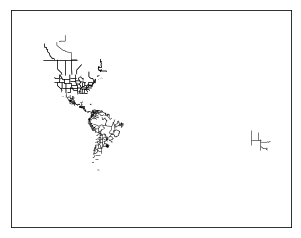

In [129]:
b = Basemap(projection='merc', \
            llcrnrlat=-80, urcrnrlat=80, \
            llcrnrlon=-180, urcrnrlon=180, \
            lat_ts=20, \
            resolution='c')
b.drawstates()
lons, lats = np.meshgrid(lons, lats)
_ = b.plot(lons, lats, 'rx')

['noaa-goes16/ABI-L2-CMIPF/2019/297/13/OR_ABI-L2-CMIPF-M6C13_G16_s20192971320364_e20192971330084_c20192971330185.nc', 'noaa-goes16/ABI-L2-CMIPF/2019/297/13/OR_ABI-L2-CMIPF-M6C13_G16_s20192971310364_e20192971320084_c20192971320166.nc', 'noaa-goes16/ABI-L2-CMIPF/2019/297/13/OR_ABI-L2-CMIPF-M6C13_G16_s20192971340364_e20192971350084_c20192971350174.nc', 'noaa-goes16/ABI-L2-CMIPF/2019/297/13/OR_ABI-L2-CMIPF-M6C13_G16_s20192971350364_e20192971400084_c20192971402473.nc', 'noaa-goes16/ABI-L2-CMIPF/2019/297/13/OR_ABI-L2-CMIPF-M6C13_G16_s20192971330364_e20192971340084_c20192971340167.nc', 'noaa-goes16/ABI-L2-CMIPF/2019/297/13/OR_ABI-L2-CMIPF-M6C13_G16_s20192971300364_e20192971310084_c20192971310175.nc']
Remapping noaa-goes16/ABI-L2-CMIPF/2019/297/13/OR_ABI-L2-CMIPF-M6C13_G16_s20192971320364_e20192971330084_c20192971330185.nc
- finished! Time: 0.0468904972076416 seconds


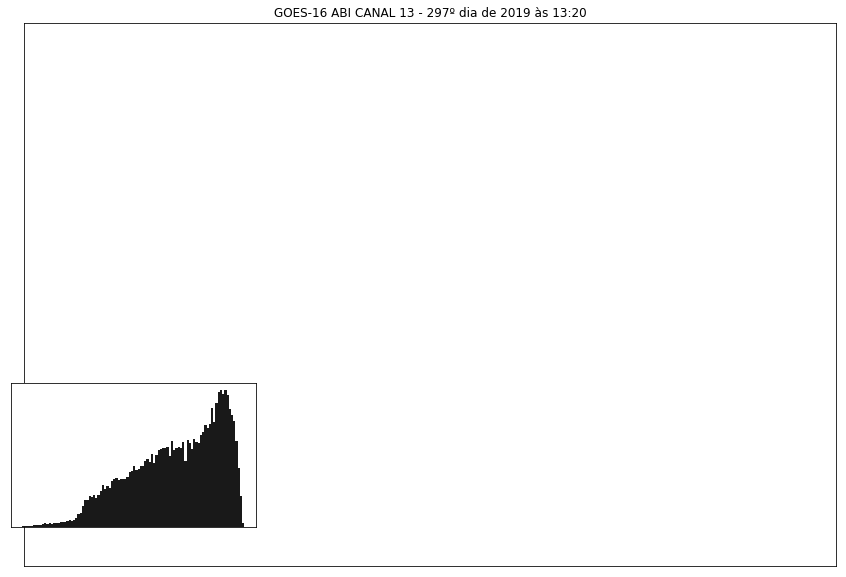

Remapping noaa-goes16/ABI-L2-CMIPF/2019/297/13/OR_ABI-L2-CMIPF-M6C13_G16_s20192971310364_e20192971320084_c20192971320166.nc
- finished! Time: 0.0470731258392334 seconds


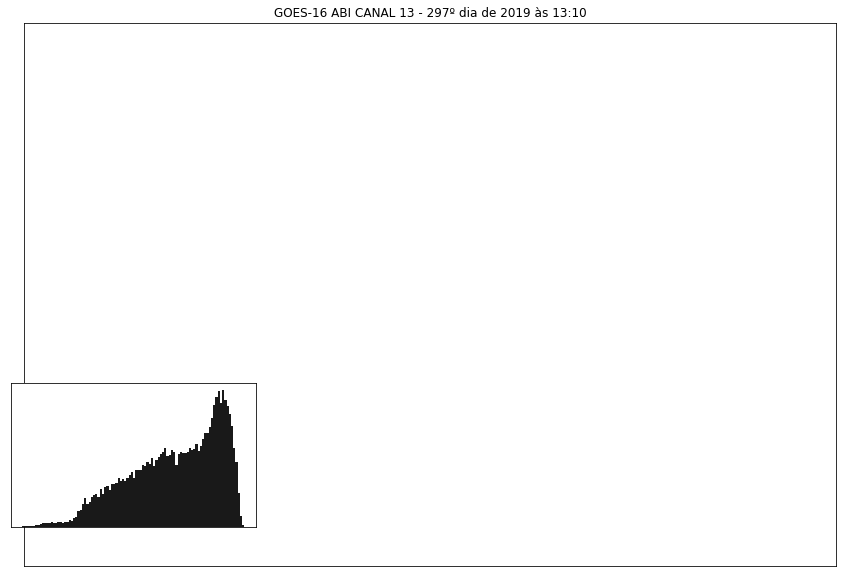

Remapping noaa-goes16/ABI-L2-CMIPF/2019/297/13/OR_ABI-L2-CMIPF-M6C13_G16_s20192971340364_e20192971350084_c20192971350174.nc
- finished! Time: 0.0502314567565918 seconds


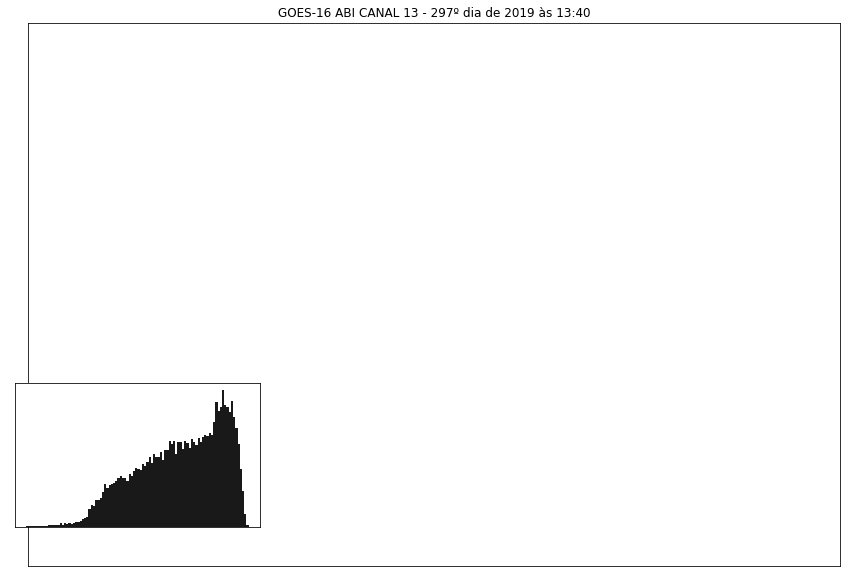

Remapping noaa-goes16/ABI-L2-CMIPF/2019/297/13/OR_ABI-L2-CMIPF-M6C13_G16_s20192971350364_e20192971400084_c20192971402473.nc
- finished! Time: 0.04667377471923828 seconds


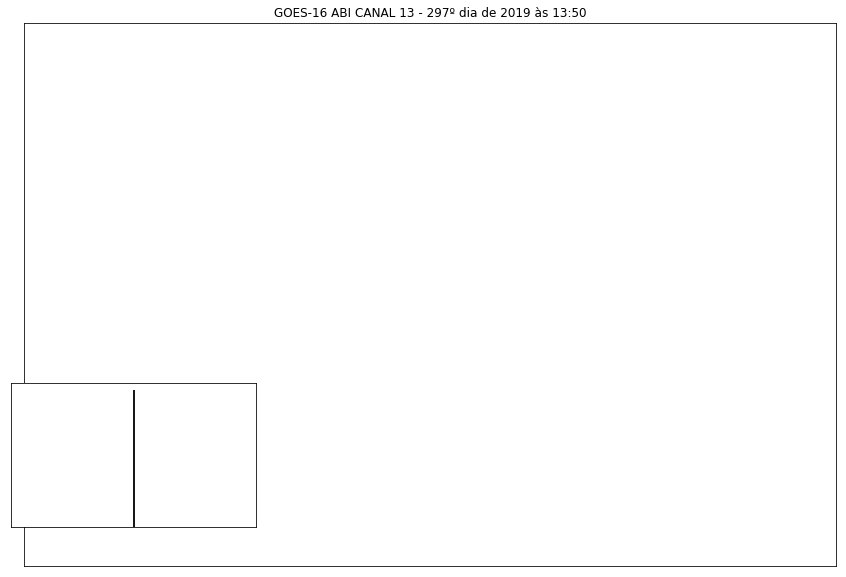

Remapping noaa-goes16/ABI-L2-CMIPF/2019/297/13/OR_ABI-L2-CMIPF-M6C13_G16_s20192971330364_e20192971340084_c20192971340167.nc
- finished! Time: 0.05044102668762207 seconds


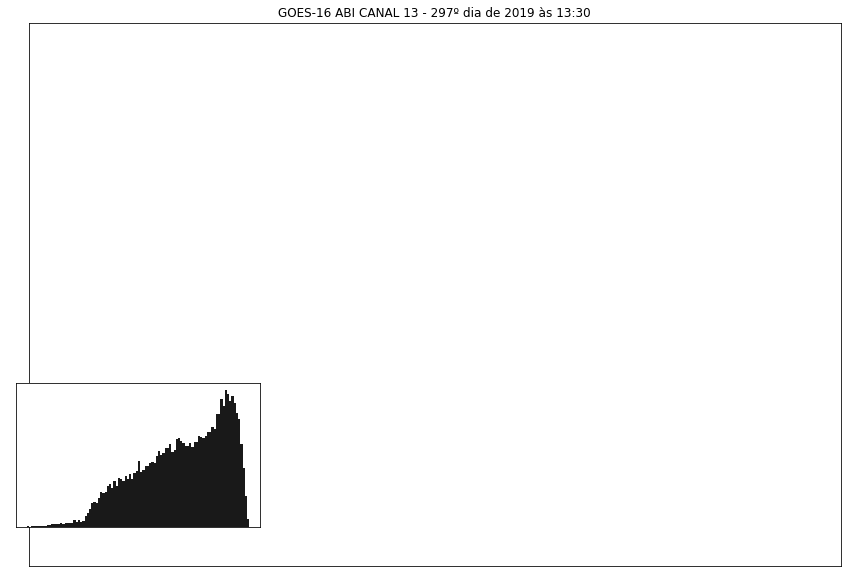

Remapping noaa-goes16/ABI-L2-CMIPF/2019/297/13/OR_ABI-L2-CMIPF-M6C13_G16_s20192971300364_e20192971310084_c20192971310175.nc
- finished! Time: 0.04827404022216797 seconds


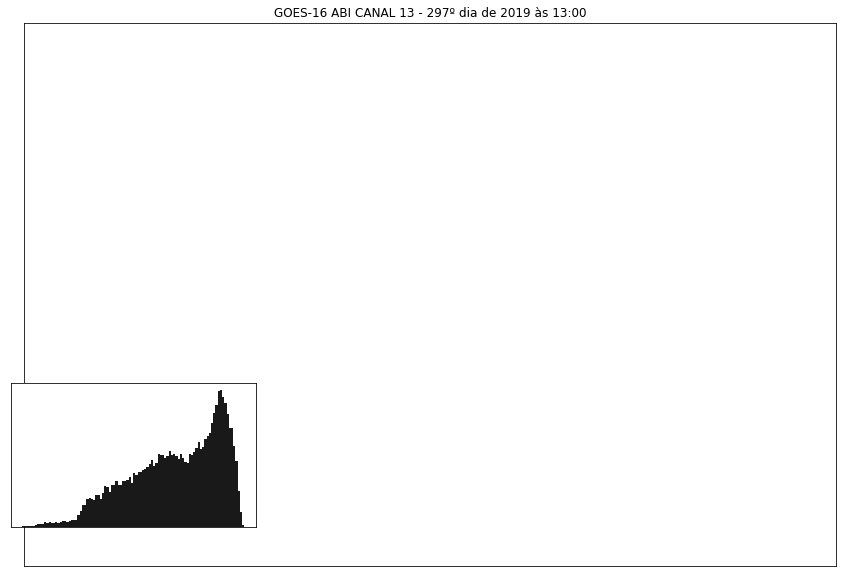

In [119]:
path = 'noaa-goes16/ABI-L2-CMIPF/2019/297/13'
files = os.listdir(path)
files = [os.path.join(path, file) for file in files]
files = list(filter(lambda x: 'C13' in x, files))
files = list(filter(lambda x: x.endswith('.nc'), files))

path2 = 'noaa-goes16/GLM-L2-LCFA/2019/297/13'
files2 = os.listdir(path2)
files2 = [os.path.join(path2, file) for file in files2]
files2 = list(filter(lambda x: x.endswith('.nc'), files2))

shp = gpd.read_file('./shapefiles/estadosl_2007.shp')
shp = shp[shp['SIGLAUF3'] == 'SP']
bbox = shp.bounds.values[0]


print(files)

for file, file2 in zip(files, files2):
    channel = file.split('/')[-1][19:21]
    year = file.split('/')[-1][27:31]
    day = file.split('/')[-1][31:34]
    hour = file.split('/')[-1][34:36]
    minute = file.split('/')[-1][36:38]

    plt.figure(figsize=(17, 10))
    plt.title('GOES-16 ABI CANAL %s - %sº dia de %s às %s:%s'%(channel, day, year, hour, minute))
    b = Basemap(projection='merc', llcrnrlon=bbox[0], llcrnrlat=bbox[1], 
            urcrnrlon=bbox[2], urcrnrlat=bbox[3])
#     b.readshapefile('./shapefiles/estadosl_2007', name='sp', linewidth=2, color='red')
    
    cpt = loadCPT('./IR4AVHRR6.cpt')
    cpt_convert = LinearSegmentedColormap('cpt', cpt)

    data = remap(file, bbox, 1, 'netCDF')
    grid = data.ReadAsArray()

    lons = np.linspace(bbox[0], bbox[2], grid.shape[1])
    lats = np.linspace(bbox[1], bbox[3], grid.shape[0])
    
#     b.drawmeridians(np.linspace(bbox[0], bbox[2], 10), labels=[False, False, False, True], 
#                 fmt='%.2f', labelstyle='+/-', color='k')
#     b.drawparallels(np.linspace(bbox[1], bbox[3], 10), labels=[True, False, False, False], 
#                     fmt='%.2f', labelstyle='+/-', color='k')
    
#     cmap = b.imshow(grid,  origin='upper', vmin=200, vmax=300, cmap=cpt_convert)
    nc = Dataset(file2)
    lats = list(nc.variables['flash_lat'][:])
    lons = list(nc.variables['flash_lon'][:])
    
    for lon, lat in zip(lons, lats):
        lon, lat = b(lon, lat)
        b.scatter(lon, lat)
    
#     cmap = b.imshow(grid, cmap=cpt_convert, alpha=.4)
#     cbar = b.colorbar(cmap, extend='both', label='Temperatura [K]')
    inside = plt.axes([.17, .18, .20, .20])
    
    inside.hist(grid.reshape(1, -1)[0], bins=100, color='k', alpha=.9)
    inside.set_xlabel('Temperatura [K]', color='w')
    inside.set_yticks([])
    inside.tick_params(colors='w')
    
    filename = file.split('/')[-1]
    plt.savefig('13/%s.png'%minute)
    
    plt.show()